# SPACEc: Cell Segmentation - The effect of channel selection on segmentation

To illustrate the effect of choosing different marker combinations on segmentation we created this brief notebook.

In [46]:
# import spacec first
import spacec as sp

#import standard packages
import os
import warnings
import matplotlib
import pickle
warnings.filterwarnings('ignore')

# set the default color map to viridis, the below paramters can be chanaged
matplotlib.rcParams["image.cmap"] = 'viridis'

In [ ]:
# where you want to store the output
output_dir = "your_output" # inset your own path
os.makedirs(output_dir, exist_ok=True)

## Cell segmentation

Load cropped image

In [ ]:
img_dir ="tonsil_tma_crop2.tif"
names="channelnames.txt"

Using CD45 and betaCatenin in combination as membrane markers covers all cells sufficiently. 

Formatting Multichannel image (59 channels)...
Formatted 59 Multichannel channels.
Combining channels ['CD45', 'betaCatenin'] into 'segmentation_channel' using max projection.


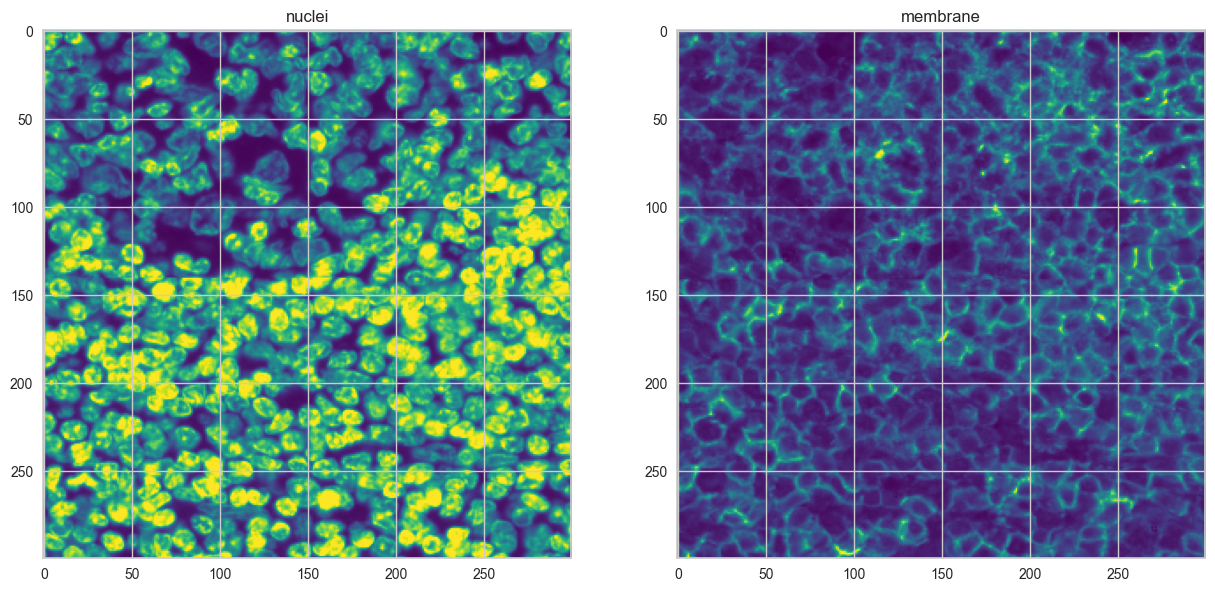

In [49]:
# (optional, one can just use nuclei for segmentation)
# Visualize membrane channels to use for cell segmentation 

sp.pl.segmentation_ch(
    file_name = img_dir, # image for segmentation
    channel_file = names, # all channels used for staining
    output_dir = output_dir, #
    extra_seg_ch_list = ["CD45", "betaCatenin"], #default is None; if provide more than one channel, then they will be combined
    nuclei_channel = 'DAPI', # channel to use for nuclei segmentation
    input_format = 'Multichannel', 
)

Using CD3 as membrane marker only covers T cells

Formatting Multichannel image (59 channels)...
Formatted 59 Multichannel channels.
Combining channels ['CD3'] into 'segmentation_channel' using max projection.


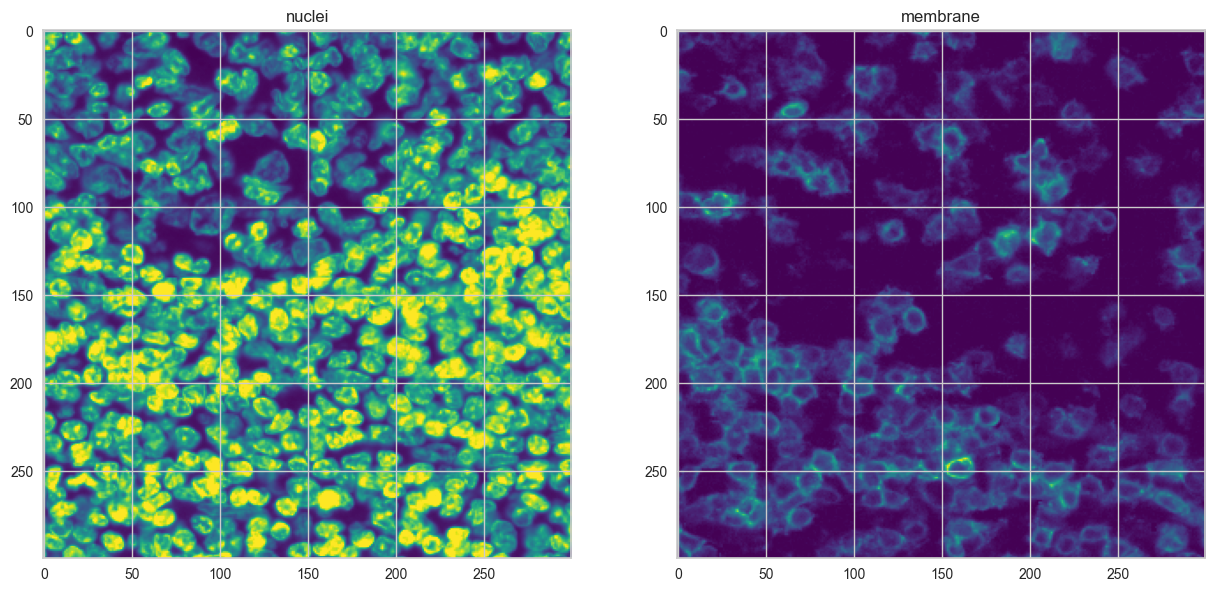

In [50]:
# (optional, one can just use nuclei for segmentation)
# Visualize membrane channels to use for cell segmentation 

sp.pl.segmentation_ch(
    file_name = img_dir, # image for segmentation
    channel_file = names, # all channels used for staining
    output_dir = output_dir, #
    extra_seg_ch_list = ["CD3"], #default is None; if provide more than one channel, then they will be combined
    nuclei_channel = 'DAPI', # channel to use for nuclei segmentation
    input_format = 'Multichannel', 
)

Using all markers in combination gives us an uneven coverage.

Formatting Multichannel image (59 channels)...
Formatted 59 Multichannel channels.
Combining channels ['FoxP3', 'HLA-DR', 'CD103', 'CHGA', 'EGFR', 'CD206', 'GFAP', 'PD-1', 'BCL2', 'panCK', 'CD45RO', 'CD11b', 'CD56', 'CD163', 'CD21', 'CD8', 'S100', 'Vimentin', 'PDGFRb', 'CCR7', 'CD57', 'CD34', 'Synaptophysin', 'CD31', 'CXCR5', 'CD3', 'CD38', 'LAG3', 'CD25', 'CD16', 'IL-10', 'Ki67', 'CLEC9A', 'p53', 'CD69', 'CD11c', 'CD68', 'Ox40', 'aSMA', 'CD20', 'CD4', 'MUC-1', 'Podoplanin', 'CD45RA', 'CD15', 'betaCatenin', 'PAX5', 'MCT', 'FAP', 'CD138', 'Tbet', 'GranzymeB', 'IDO-1', 'CD45', 'CollagenIV', 'PD-L1', 'Arginase-1', 'GATA3'] into 'segmentation_channel' using max projection.


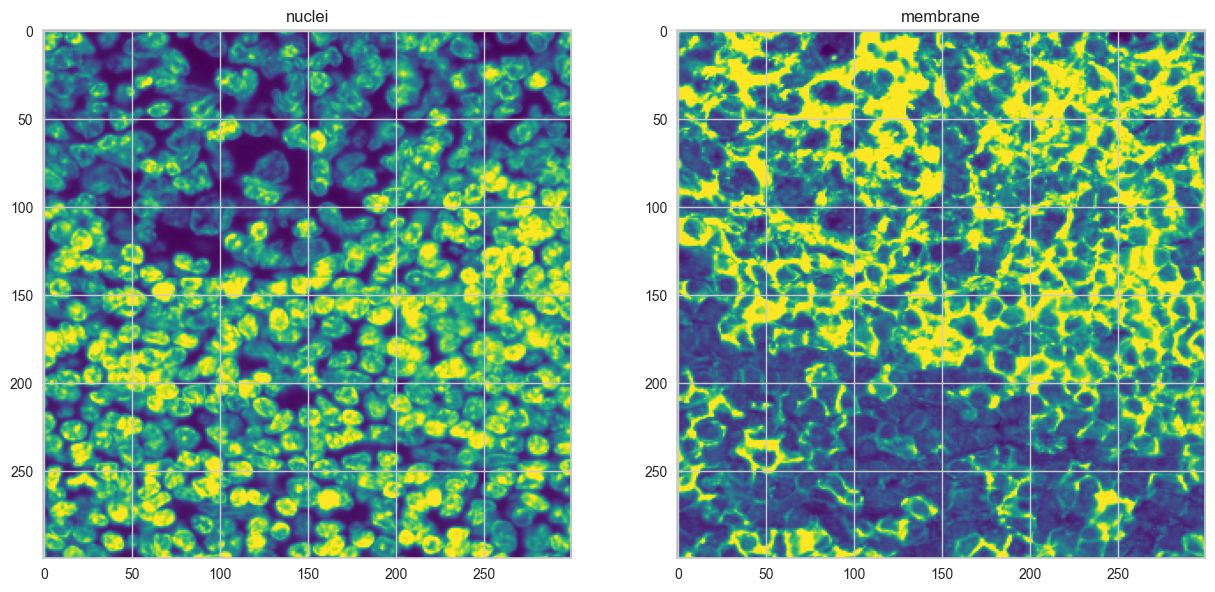

In [51]:
# (optional, one can just use nuclei for segmentation)
# Visualize membrane channels to use for cell segmentation 

sp.pl.segmentation_ch(
    file_name = img_dir, # image for segmentation
    channel_file = names, # all channels used for staining
    output_dir = output_dir, #
    extra_seg_ch_list = [
    "FoxP3", "HLA-DR", "CD103", "CHGA", "EGFR", "CD206", "GFAP", "PD-1", "BCL2", "panCK",
    "CD45RO", "CD11b", "CD56", "CD163", "CD21", "CD8", "S100", "Vimentin", "PDGFRb", "CCR7",
    "CD57", "CD34", "Synaptophysin", "CD31", "CXCR5", "CD3", "CD38", "LAG3", "CD25", "CD16",
    "IL-10", "Ki67", "CLEC9A", "p53", "CD69", "CD11c", "CD68", "Ox40", "aSMA", "CD20", "CD4",
    "MUC-1", "Podoplanin", "CD45RA", "CD15", "betaCatenin", "PAX5", "MCT", "FAP", "CD138",
    "Tbet", "GranzymeB", "IDO-1", "CD45", "CollagenIV", "PD-L1", "Arginase-1", "GATA3"
], #default is None; if provide more than one channel, then they will be combined
    nuclei_channel = 'DAPI', # channel to use for nuclei segmentation
    input_format = 'Multichannel', 
)

## Perform segmentation

Nuclear segmentation only

In [52]:
# choose between cellpose or mesmer for segmentation
# first image
# seg_output contains {'img': img, 'image_dict': image_dict, 'masks': masks}
nuc_only = sp.tl.cell_segmentation(
    file_name = img_dir,
    channel_file = names,
    output_dir = output_dir,
    seg_method ='mesmer', # cellpose or mesmer
    nuclei_channel = 'DAPI',
    output_fname = 'tonsil1',
    membrane_channel_list = [], #default is None; if provide more than one channel, then they will be combined
    compartment = 'whole-cell', # mesmer # segment whole cells or nuclei only
    input_format ='Multichannel', # Phenocycler or codex
    resize_factor=1, # default is 1; if the image is too large, lower the value. Lower values will speed up the segmentation but may reduce the accuracy.
    size_cutoff = 0)

--- Initializing Segmentation Pipeline ---
GPU(s) available: 1. Memory growth enabled.
Output basename: tonsil1
Segmentation method: mesmer
Differentiate Nucleus/Cytoplasm: False
--- Loading Image Data (Format: Multichannel) ---
Loading image: /Users/timkempchen/Downloads/example_data/raw/tonsil_tma_crop2.tif
Loaded image shape: (59, 300, 300)
Loaded 59 channel names from: /Users/timkempchen/Downloads/example_data/raw/channelnames.txt
Formatting Multichannel image (59 channels)...
Formatted 59 Multichannel channels.
Image dictionary created with 59 channels.

--- Preparing Segmentation Inputs ---
Segmentation dictionary prepared with channels: ['DAPI']
Resize factor is 1, skipping image resizing.
Image shape for segmentation: (300, 300)

--- Processing Full Image for Segmentation ---

--- Segmentation Mode: Standard ---
Performing nuclear-only segmentation (no membrane channels provided).
Processing full image...
Running Mesmer segmentation: compartment='nuclear', mpp=0.5
Found existin

2025-06-05 19:15:30.400741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Extracted Mesmer mask with shape: (300, 300), max label: 450
Resizing final mask to original image shape...

--- Extracting Features ---
Quantifying features for segmented objects...
--- Starting Feature Extraction ---
Calculating morphological features...
Calculated initial morphology for 450 objects.
Filtering objects with area < 0 pixels...
Found 450 objects after size filtering.
Creating filtered mask for intensity calculation...
Calculating mean intensities...
Processing intensities on full images.


Processing channels: 100%|██████████| 59/59 [00:07<00:00,  8.07it/s]


Combining morphology and intensity features...
Successfully saved features for 450 objects to /Users/timkempchen/Downloads/example_data/example_revision/tonsil1_features.csv
--- Feature Extraction Complete ---
Saved features to /Users/timkempchen/Downloads/example_data/example_revision/tonsil1_features.csv

--- Segmentation Pipeline Complete ---


Nuclear + CD3

In [53]:
# choose between cellpose or mesmer for segmentation
# first image
# seg_output contains {'img': img, 'image_dict': image_dict, 'masks': masks}
CD3 = sp.tl.cell_segmentation(
    file_name = img_dir,
    channel_file = names,
    output_dir = output_dir,
    seg_method ='mesmer', # cellpose or mesmer
    nuclei_channel = 'DAPI',
    output_fname = 'tonsil1',
    membrane_channel_list = [
     "CD3",
], #default is None; if provide more than one channel, then they will be combined
    compartment = 'whole-cell', # mesmer # segment whole cells or nuclei only
    input_format ='Multichannel', # Phenocycler or codex
    resize_factor=1, # default is 1; if the image is too large, lower the value. Lower values will speed up the segmentation but may reduce the accuracy.
    size_cutoff = 0)

--- Initializing Segmentation Pipeline ---
GPU(s) available: 1. Memory growth enabled.
Output basename: tonsil1
Segmentation method: mesmer
Differentiate Nucleus/Cytoplasm: False
--- Loading Image Data (Format: Multichannel) ---
Loading image: /Users/timkempchen/Downloads/example_data/raw/tonsil_tma_crop2.tif
Loaded image shape: (59, 300, 300)
Loaded 59 channel names from: /Users/timkempchen/Downloads/example_data/raw/channelnames.txt
Formatting Multichannel image (59 channels)...
Formatted 59 Multichannel channels.
Image dictionary created with 59 channels.

--- Preparing Segmentation Inputs ---
Combining channels ['CD3'] into 'segmentation_channel' using max projection.
Segmentation dictionary prepared with channels: ['DAPI', 'segmentation_channel']
Resize factor is 1, skipping image resizing.
Image shape for segmentation: (300, 300)

--- Processing Full Image for Segmentation ---

--- Segmentation Mode: Standard ---
Processing full image...
Running Mesmer segmentation: compartment='

2025-06-05 19:15:53.978761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Extracted Mesmer mask with shape: (300, 300), max label: 454
Resizing final mask to original image shape...

--- Extracting Features ---
Quantifying features for segmented objects...
--- Starting Feature Extraction ---
Calculating morphological features...
Calculated initial morphology for 454 objects.
Filtering objects with area < 0 pixels...
Found 454 objects after size filtering.
Creating filtered mask for intensity calculation...
Calculating mean intensities...
Processing intensities on full images.


Processing channels: 100%|██████████| 59/59 [00:07<00:00,  8.24it/s]


Combining morphology and intensity features...
Successfully saved features for 454 objects to /Users/timkempchen/Downloads/example_data/example_revision/tonsil1_features.csv
--- Feature Extraction Complete ---
Saved features to /Users/timkempchen/Downloads/example_data/example_revision/tonsil1_features.csv

--- Segmentation Pipeline Complete ---


Nuclear + CD45 + betaCatenin

In [54]:
# choose between cellpose or mesmer for segmentation
# first image
# seg_output contains {'img': img, 'image_dict': image_dict, 'masks': masks}
selected_membrane = sp.tl.cell_segmentation(
    file_name = img_dir,
    channel_file = names,
    output_dir = output_dir,
    seg_method ='mesmer', # cellpose or mesmer
    nuclei_channel = 'DAPI',
    output_fname = 'tonsil1',
    membrane_channel_list = ["CD45", "betaCatenin"], #default is None; if provide more than one channel, then they will be combined
    compartment = 'whole-cell', # mesmer # segment whole cells or nuclei only
    input_format ='Multichannel', # Phenocycler or codex
    resize_factor=1, # default is 1; if the image is too large, lower the value. Lower values will speed up the segmentation but may reduce the accuracy.
    size_cutoff = 0)

--- Initializing Segmentation Pipeline ---
GPU(s) available: 1. Memory growth enabled.
Output basename: tonsil1
Segmentation method: mesmer
Differentiate Nucleus/Cytoplasm: False
--- Loading Image Data (Format: Multichannel) ---
Loading image: /Users/timkempchen/Downloads/example_data/raw/tonsil_tma_crop2.tif
Loaded image shape: (59, 300, 300)
Loaded 59 channel names from: /Users/timkempchen/Downloads/example_data/raw/channelnames.txt
Formatting Multichannel image (59 channels)...
Formatted 59 Multichannel channels.
Image dictionary created with 59 channels.

--- Preparing Segmentation Inputs ---
Combining channels ['CD45', 'betaCatenin'] into 'segmentation_channel' using max projection.
Segmentation dictionary prepared with channels: ['DAPI', 'segmentation_channel']
Resize factor is 1, skipping image resizing.
Image shape for segmentation: (300, 300)

--- Processing Full Image for Segmentation ---

--- Segmentation Mode: Standard ---
Processing full image...
Running Mesmer segmentatio

2025-06-05 19:16:15.137389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Extracted Mesmer mask with shape: (300, 300), max label: 463
Resizing final mask to original image shape...

--- Extracting Features ---
Quantifying features for segmented objects...
--- Starting Feature Extraction ---
Calculating morphological features...
Calculated initial morphology for 463 objects.
Filtering objects with area < 0 pixels...
Found 463 objects after size filtering.
Creating filtered mask for intensity calculation...
Calculating mean intensities...
Processing intensities on full images.


Processing channels: 100%|██████████| 59/59 [00:07<00:00,  7.84it/s]


Combining morphology and intensity features...
Successfully saved features for 463 objects to /Users/timkempchen/Downloads/example_data/example_revision/tonsil1_features.csv
--- Feature Extraction Complete ---
Saved features to /Users/timkempchen/Downloads/example_data/example_revision/tonsil1_features.csv

--- Segmentation Pipeline Complete ---


All marker

In [55]:
# choose between cellpose or mesmer for segmentation
# first image
# seg_output contains {'img': img, 'image_dict': image_dict, 'masks': masks}
all_marker = sp.tl.cell_segmentation(
    file_name = img_dir,
    channel_file = names,
    output_dir = output_dir,
    seg_method ='mesmer', # cellpose or mesmer
    nuclei_channel = 'DAPI',
    output_fname = 'tonsil1',
    membrane_channel_list = [
    "FoxP3", "HLA-DR", "CD103", "CHGA", "EGFR", "CD206", "GFAP", "PD-1", "BCL2", "panCK",
    "CD45RO", "CD11b", "CD56", "CD163", "CD21", "CD8", "S100", "Vimentin", "PDGFRb", "CCR7",
    "CD57", "CD34", "Synaptophysin", "CD31", "CXCR5", "CD3", "CD38", "LAG3", "CD25", "CD16",
    "IL-10", "Ki67", "CLEC9A", "p53", "CD69", "CD11c", "CD68", "Ox40", "aSMA", "CD20", "CD4",
    "MUC-1", "Podoplanin", "CD45RA", "CD15", "betaCatenin", "PAX5", "MCT", "FAP", "CD138",
    "Tbet", "GranzymeB", "IDO-1", "CD45", "CollagenIV", "PD-L1", "Arginase-1", "GATA3"
], #default is None; if provide more than one channel, then they will be combined
    compartment = 'whole-cell', # mesmer # segment whole cells or nuclei only
    input_format ='Multichannel', # Phenocycler or codex
    resize_factor=1, # default is 1; if the image is too large, lower the value. Lower values will speed up the segmentation but may reduce the accuracy.
    size_cutoff = 0)

--- Initializing Segmentation Pipeline ---
GPU(s) available: 1. Memory growth enabled.
Output basename: tonsil1
Segmentation method: mesmer
Differentiate Nucleus/Cytoplasm: False
--- Loading Image Data (Format: Multichannel) ---
Loading image: /Users/timkempchen/Downloads/example_data/raw/tonsil_tma_crop2.tif
Loaded image shape: (59, 300, 300)
Loaded 59 channel names from: /Users/timkempchen/Downloads/example_data/raw/channelnames.txt
Formatting Multichannel image (59 channels)...
Formatted 59 Multichannel channels.
Image dictionary created with 59 channels.

--- Preparing Segmentation Inputs ---
Combining channels ['FoxP3', 'HLA-DR', 'CD103', 'CHGA', 'EGFR', 'CD206', 'GFAP', 'PD-1', 'BCL2', 'panCK', 'CD45RO', 'CD11b', 'CD56', 'CD163', 'CD21', 'CD8', 'S100', 'Vimentin', 'PDGFRb', 'CCR7', 'CD57', 'CD34', 'Synaptophysin', 'CD31', 'CXCR5', 'CD3', 'CD38', 'LAG3', 'CD25', 'CD16', 'IL-10', 'Ki67', 'CLEC9A', 'p53', 'CD69', 'CD11c', 'CD68', 'Ox40', 'aSMA', 'CD20', 'CD4', 'MUC-1', 'Podoplanin',

2025-06-05 19:16:36.212922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Extracted Mesmer mask with shape: (300, 300), max label: 457
Resizing final mask to original image shape...

--- Extracting Features ---
Quantifying features for segmented objects...
--- Starting Feature Extraction ---
Calculating morphological features...
Calculated initial morphology for 457 objects.
Filtering objects with area < 0 pixels...
Found 457 objects after size filtering.
Creating filtered mask for intensity calculation...
Calculating mean intensities...
Processing intensities on full images.


Processing channels: 100%|██████████| 59/59 [00:07<00:00,  8.36it/s]


Combining morphology and intensity features...
Successfully saved features for 457 objects to /Users/timkempchen/Downloads/example_data/example_revision/tonsil1_features.csv
--- Feature Extraction Complete ---
Saved features to /Users/timkempchen/Downloads/example_data/example_revision/tonsil1_features.csv

--- Segmentation Pipeline Complete ---


## Viusalizing the segmentation result

Combining channels ['CD45', 'betaCatenin'] into 'segmentation_channel' using max projection.


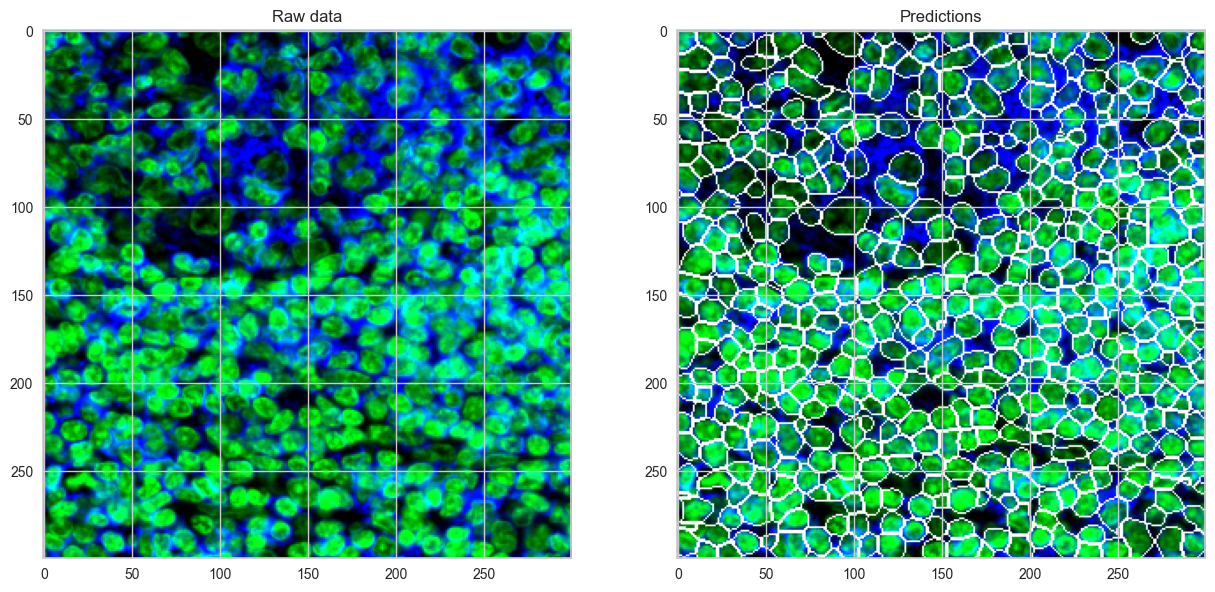

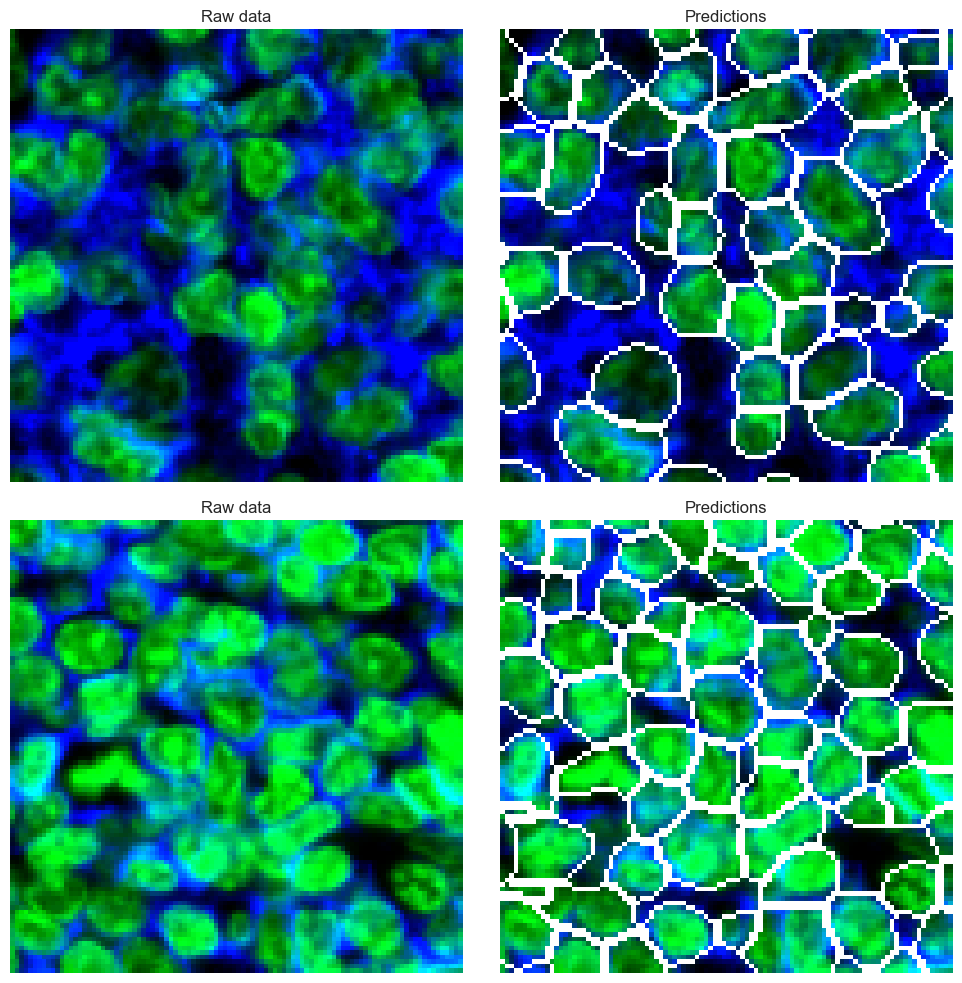

In [66]:
overlay_data1, rgb_images1 = sp.pl.show_masks(
    seg_output=nuc_only, # output from cell segmentation
    nucleus_channel = 'DAPI', # channel used for nuclei segmentation (displayed in blue)
    additional_channels = ["CD45", "betaCatenin"], # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 100,# number of subsamples and tilesize
    rand_seed = 3)

Combining channels ['CD45', 'betaCatenin'] into 'segmentation_channel' using max projection.


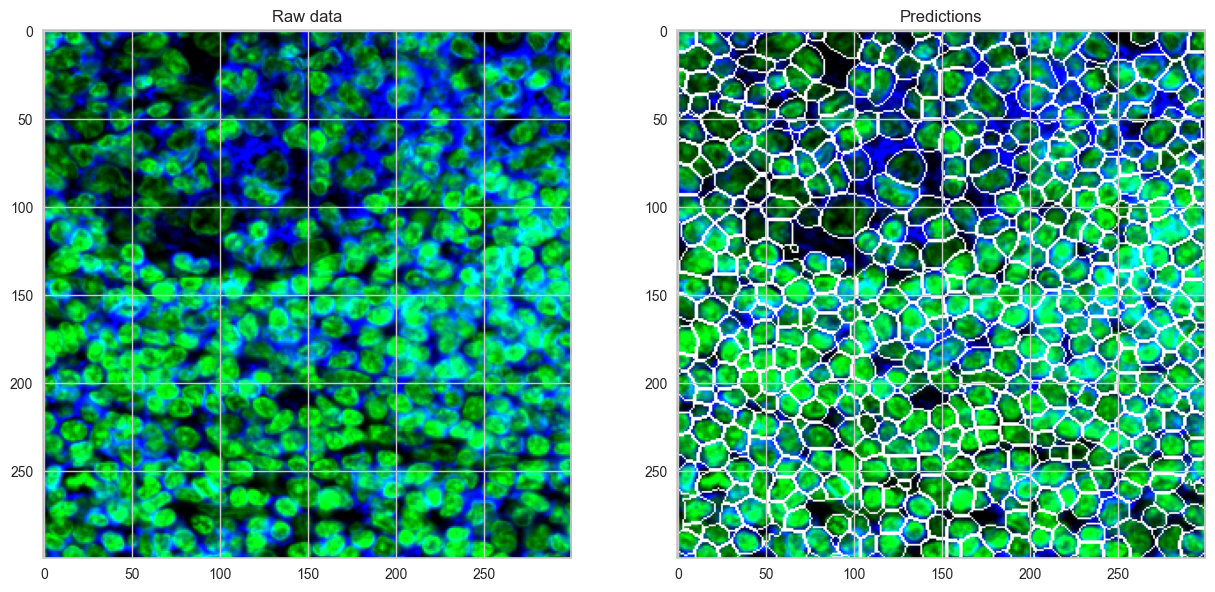

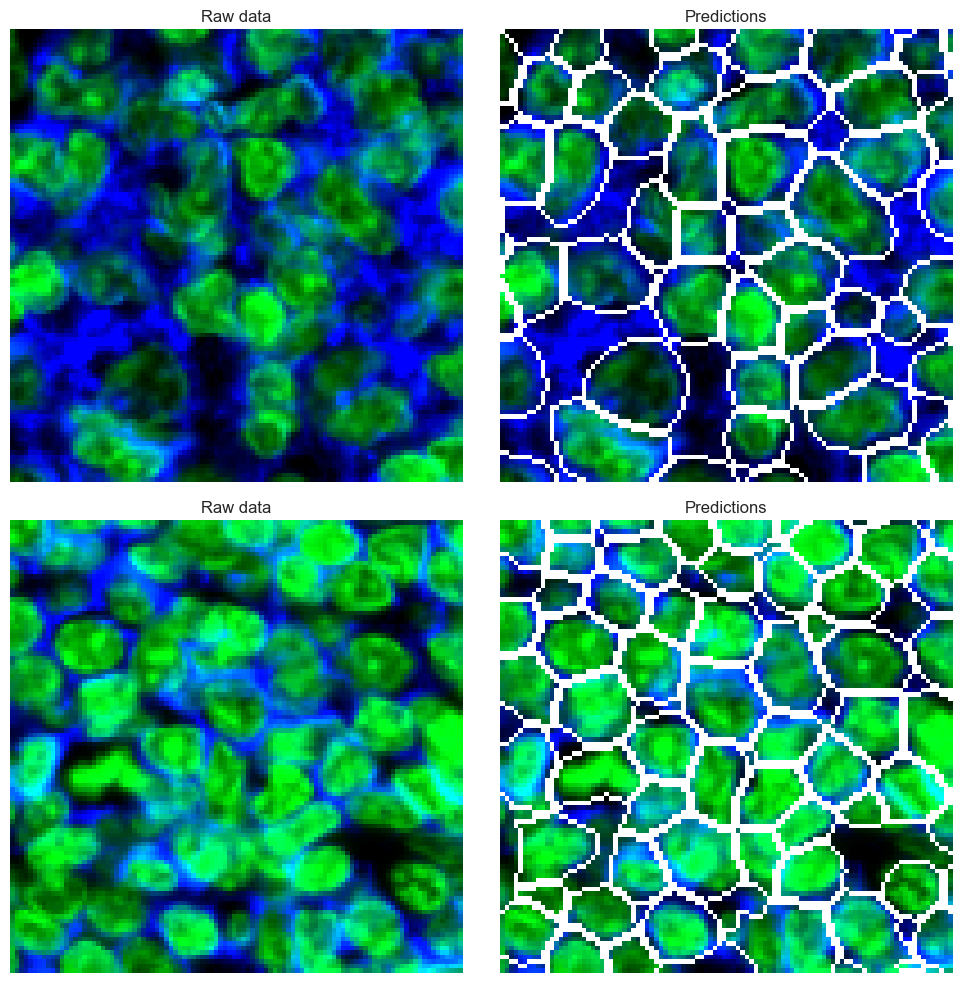

In [65]:
overlay_data1, rgb_images1 = sp.pl.show_masks(
    seg_output=CD3, # output from cell segmentation
    nucleus_channel = 'DAPI', # channel used for nuclei segmentation (displayed in blue)
    additional_channels = ["CD45", "betaCatenin"], # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 100,# number of subsamples and tilesize
    rand_seed = 3)

Combining channels ['CD45', 'betaCatenin'] into 'segmentation_channel' using max projection.


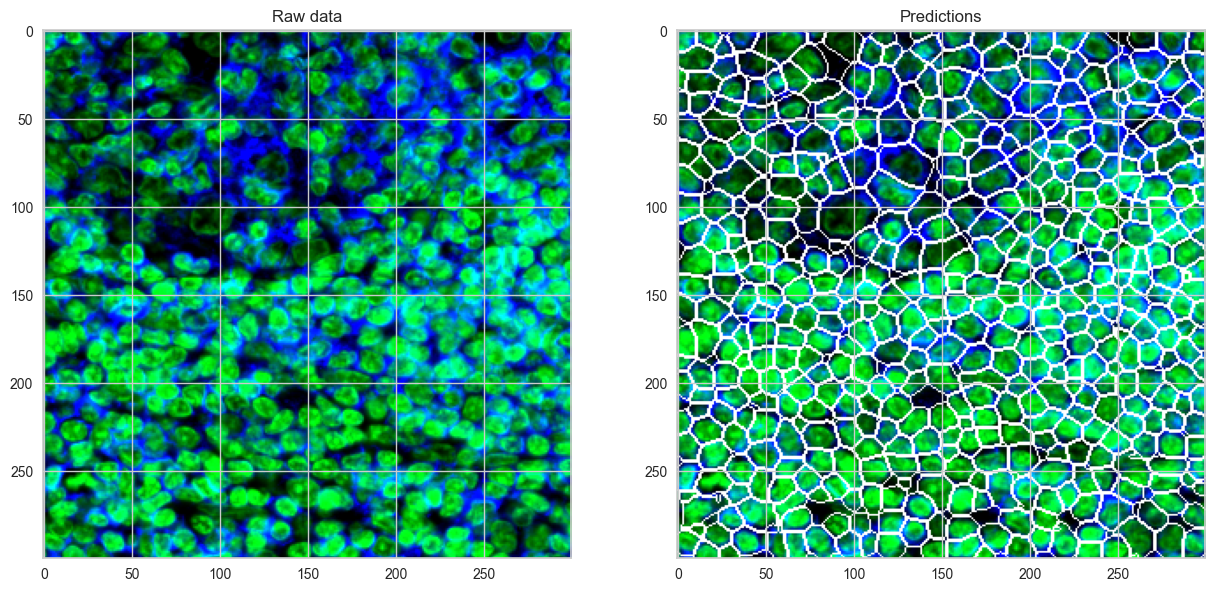

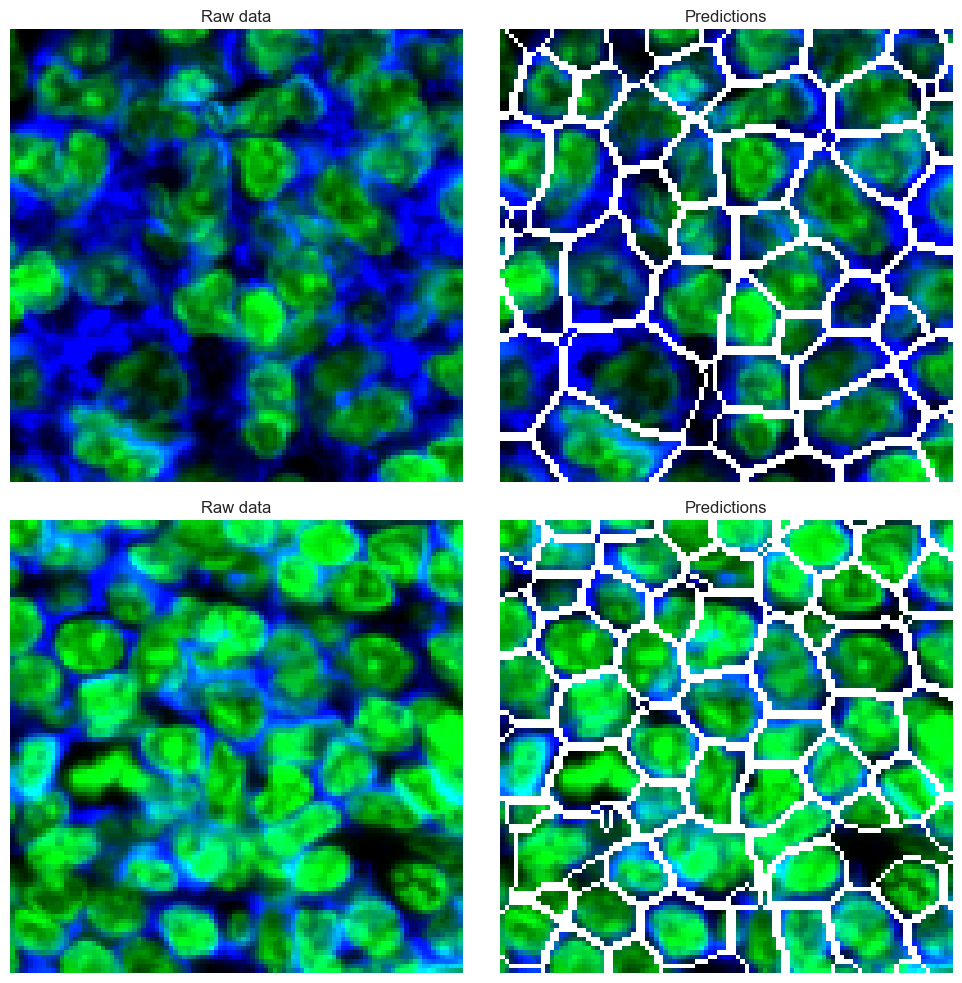

In [67]:
overlay_data1, rgb_images1 = sp.pl.show_masks(
    seg_output=selected_membrane, # output from cell segmentation
    nucleus_channel = 'DAPI', # channel used for nuclei segmentation (displayed in blue)
    additional_channels = ["CD45", "betaCatenin"], # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 100,# number of subsamples and tilesize
    rand_seed = 3)

Combining channels ['CD45', 'betaCatenin'] into 'segmentation_channel' using max projection.


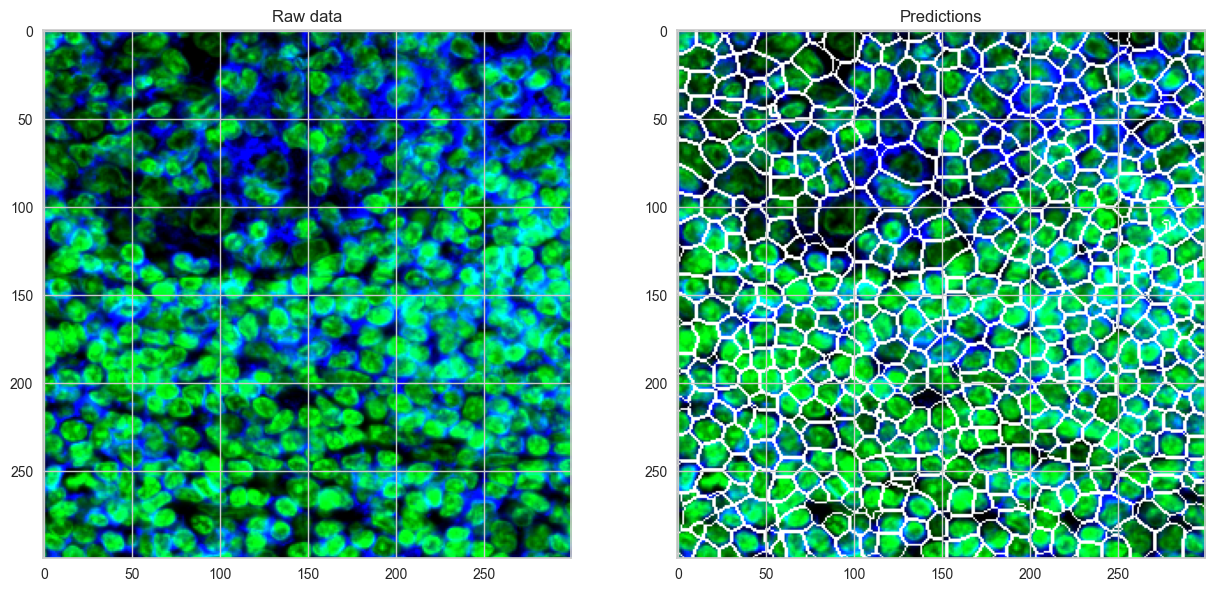

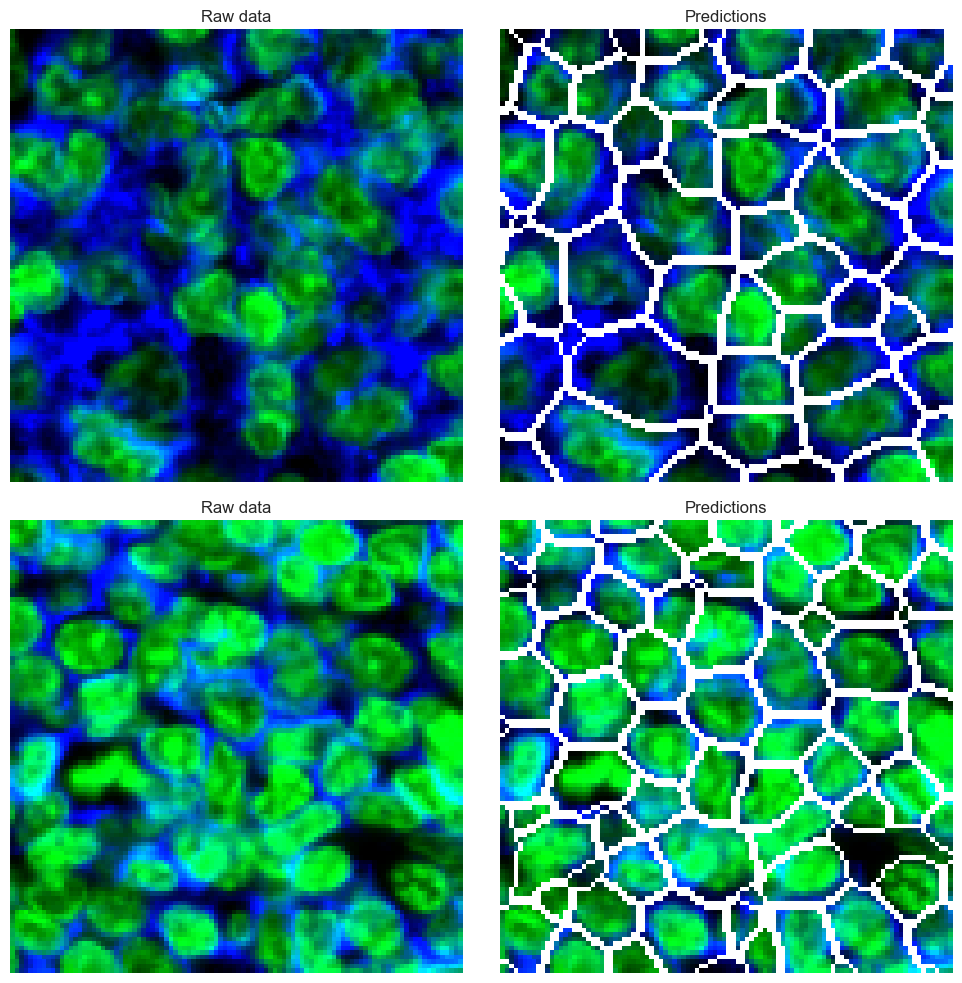

In [64]:
overlay_data1, rgb_images1 = sp.pl.show_masks(
    seg_output=all_marker, # output from cell segmentation
    nucleus_channel = 'DAPI', # channel used for nuclei segmentation (displayed in blue)
    additional_channels = ["CD45", "betaCatenin"], # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 100,# number of subsamples and tilesize
    rand_seed = 3)